# Random Forest Regressor Project 
In this project we will be exploring the Boston housing dataset.We will try to predict the the value of the house using random forest regressor model 


### Importing the modules that are required and Loading the dataset

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
%matplotlib inline

In [3]:
df=pd.read_csv('data/housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis

##### Checking for missing value and filling the missing values

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### checking the shape,duplicates of dataset

In [12]:
df.shape

(20640, 10)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Data Visualization

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


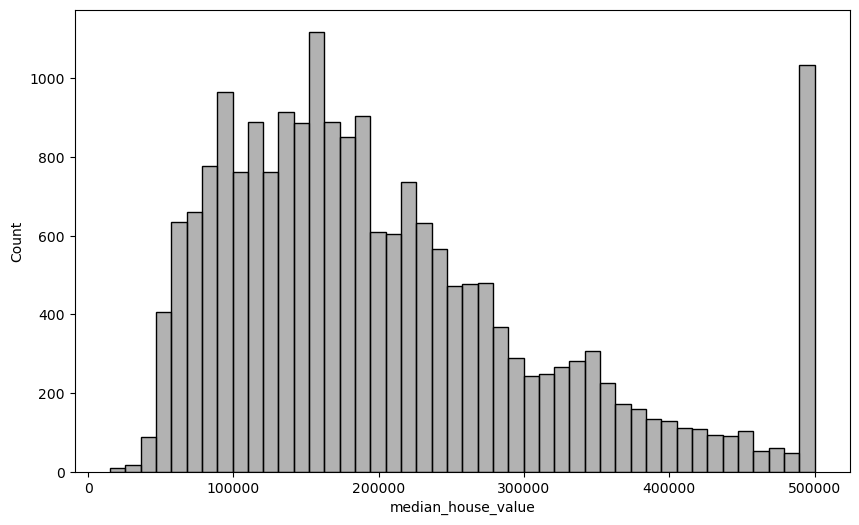

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'],color='grey',alpha=0.6)
plt.show()

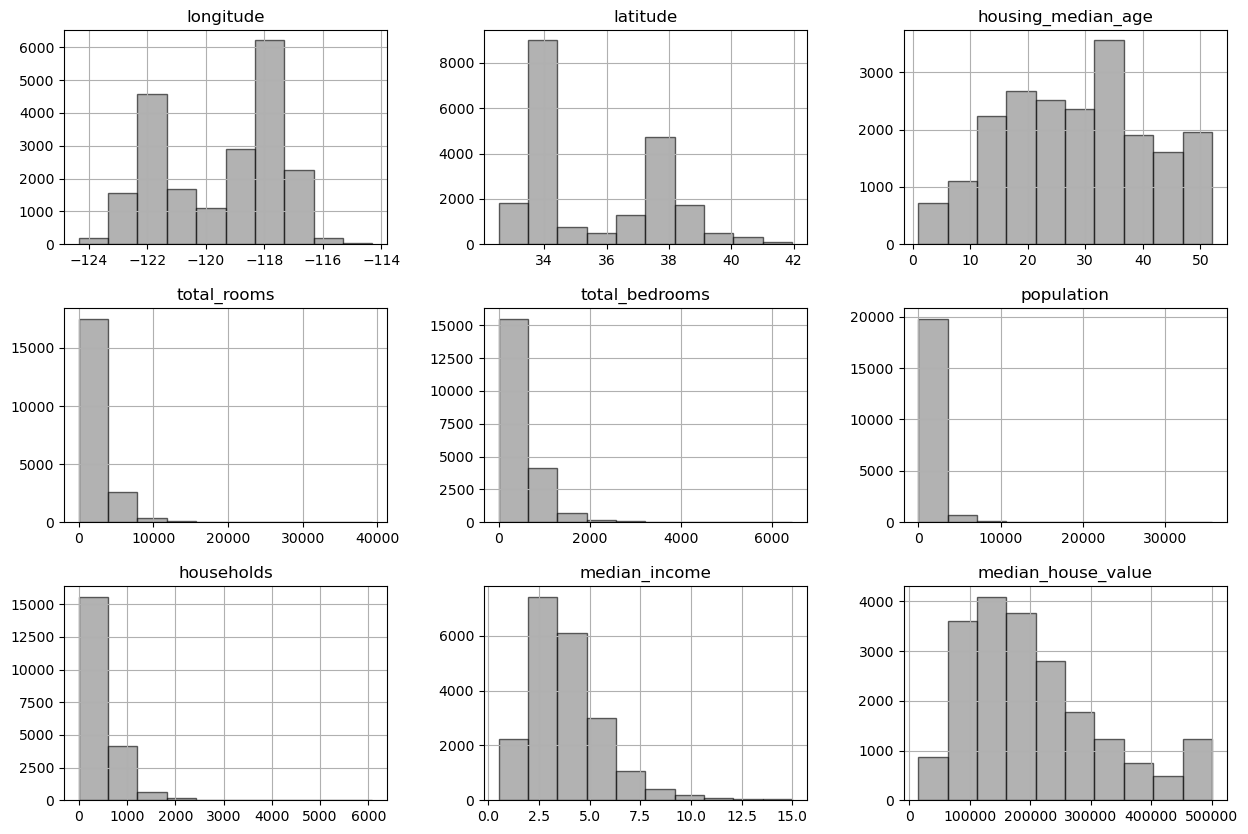

In [34]:
df.hist(figsize=(15,10),color='grey',edgecolor='black',alpha=0.6)
plt.show()

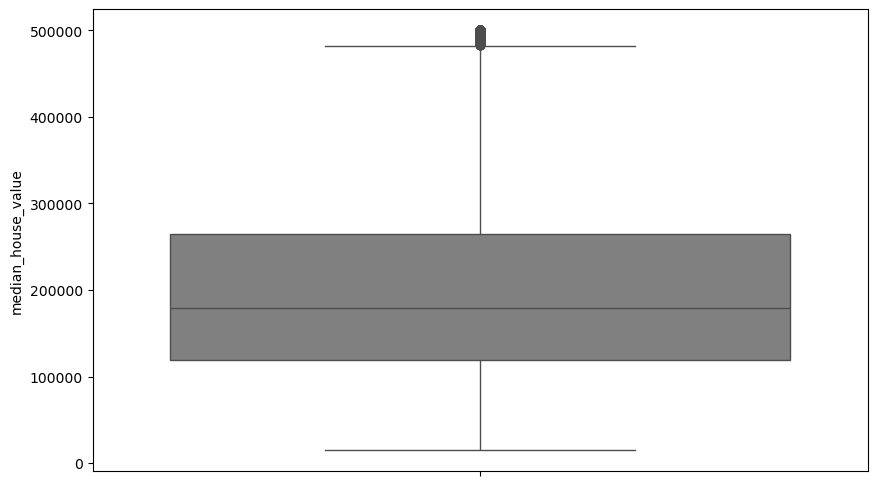

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['median_house_value'],color='grey')
plt.show()

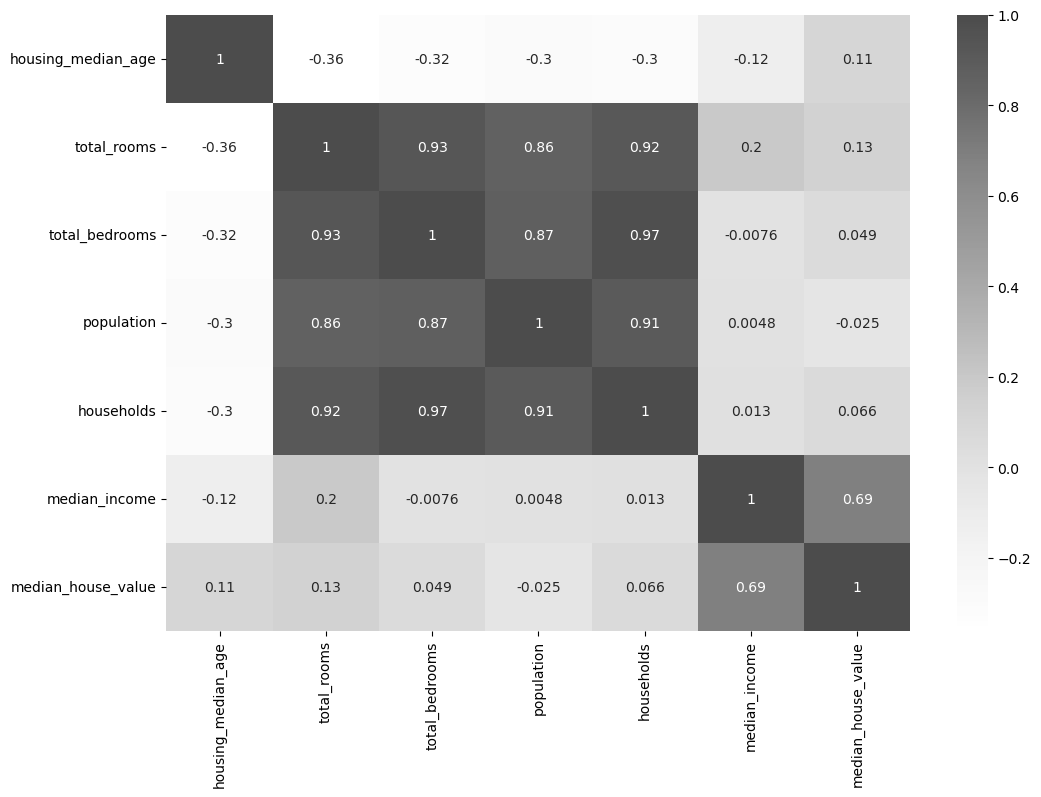

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].corr(),
        annot=True,cmap = "Greys" ,alpha=0.7)
plt.show()

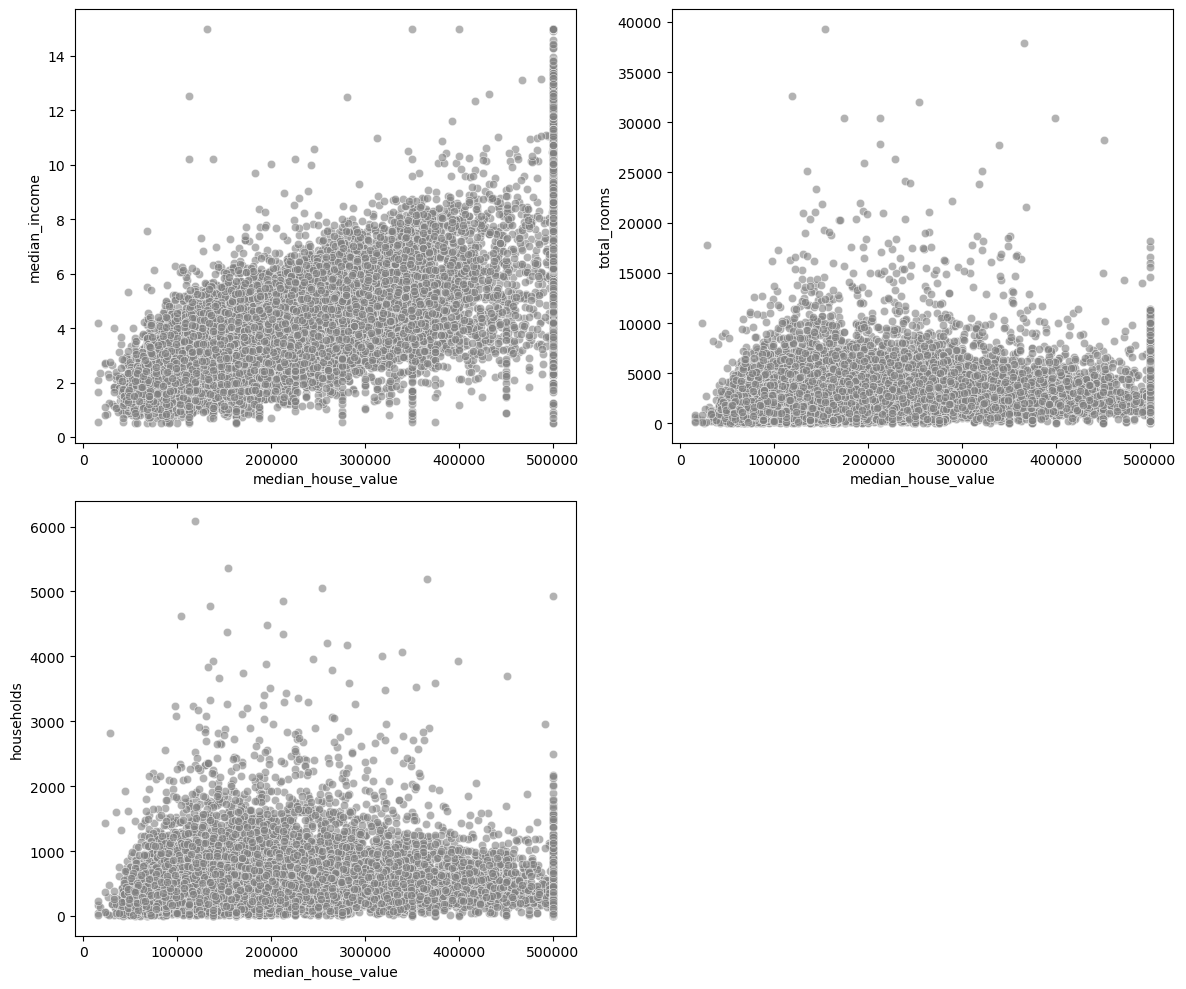

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot( y='median_income',x='median_house_value',data=df,color='grey',alpha=0.6,ax=axs[0, 0])

sns.scatterplot(y='total_rooms',x='median_house_value',data=df,color='grey',alpha=0.6,ax=axs[0, 1])

sns.scatterplot(y='households',x='median_house_value',data=df,color='grey',alpha=0.6,ax=axs[1, 0])

fig.delaxes(axs[1, 1])
plt.tight_layout()
plt.show()


## Preprocessing and Model Training 

In [76]:
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']

In [79]:
num_features = X.select_dtypes(exclude='object').columns

cat_features = ['ocean_proximity']

scaler=StandardScaler()
encoder=OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[
        ('num',scaler,num_features),
        ('cat',encoder,cat_features)])

model=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('training',RandomForestRegressor())])

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
model.fit(X_train,Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('training', RandomForestRegressor())])

In [94]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 31672.872214147286
MSE: 2403006062.7111874
RMSE: 49020.465753715434
R2: 0.8166216728813172
